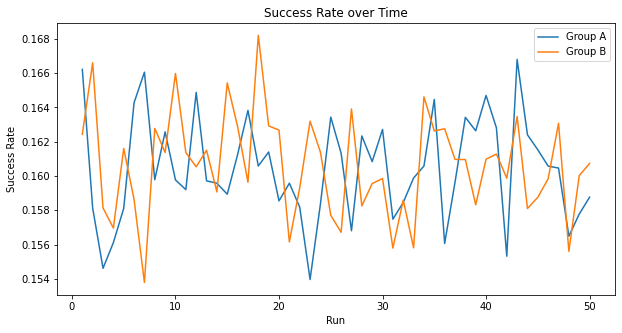

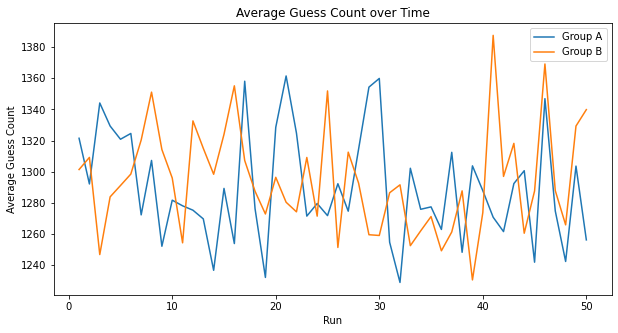

In [15]:
import pandas as pd
import statsmodels.api as sm

# Load data
df = pd.read_csv('mastermind-results1.csv')

# Plot success rate
plt.figure(figsize=(10, 5))
plt.plot(df['Run'], df['Success Rate Group A'], label='Group A')
plt.plot(df['Run'], df['Success Rate Group B'], label='Group B')
plt.xlabel('Run')
plt.ylabel('Success Rate')
plt.legend()
plt.title('Success Rate over Time')
plt.show()

# Plot average guess count
plt.figure(figsize=(10, 5))
plt.plot(df['Run'], df['Avg. Guesses Group A'], label='Group A')
plt.plot(df['Run'], df['Avg. Guesses Group B'], label='Group B')
plt.xlabel('Run')
plt.ylabel('Average Guess Count')
plt.legend()
plt.title('Average Guess Count over Time')
plt.show()

In [16]:
# Create a binary variable representing the intervention
df['Intervention'] = (df['Run'] > df['Run'].median()).astype(int)

# Fit an interrupted time series model for Group A
model_a = sm.OLS(df['Success Rate Group A'], sm.add_constant(df[['Run', 'Intervention']]))
result_a = model_a.fit()
print(result_a.summary())

# Fit an interrupted time series model for Group B
model_b = sm.OLS(df['Success Rate Group B'], sm.add_constant(df[['Run', 'Intervention']]))
result_b = model_b.fit()
print(result_b.summary())

                             OLS Regression Results                             
Dep. Variable:     Success Rate Group A   R-squared:                       0.008
Model:                              OLS   Adj. R-squared:                 -0.034
Method:                   Least Squares   F-statistic:                    0.1991
Date:                  Mon, 12 Jun 2023   Prob (F-statistic):              0.820
Time:                          01:44:07   Log-Likelihood:                 219.26
No. Observations:                    50   AIC:                            -432.5
Df Residuals:                        47   BIC:                            -426.8
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1607     

In [13]:
# Create a binary variable representing the intervention
df['Intervention'] = (df['Run'] > df['Run'].median()).astype(int)

# Fit an interrupted time series model for average guesses in Group A
model_a_guesses = sm.OLS(df['Avg. Guesses Group A'], sm.add_constant(df[['Run', 'Intervention']]))
result_a_guesses = model_a_guesses.fit()
print(result_a_guesses.summary())

# Fit an interrupted time series model for average guesses in Group B
model_b_guesses = sm.OLS(df['Avg. Guesses Group B'], sm.add_constant(df[['Run', 'Intervention']]))
result_b_guesses = model_b_guesses.fit()
print(result_b_guesses.summary())


                             OLS Regression Results                             
Dep. Variable:     Avg. Guesses Group A   R-squared:                       0.058
Model:                              OLS   Adj. R-squared:                  0.018
Method:                   Least Squares   F-statistic:                     1.457
Date:                  Sun, 11 Jun 2023   Prob (F-statistic):              0.243
Time:                          22:00:17   Log-Likelihood:                -246.92
No. Observations:                    50   AIC:                             499.8
Df Residuals:                        47   BIC:                             505.6
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1307.2319     